In [1]:
import pandas as pd
from sklearn.svm import SVC
import json
import numpy as np

In [2]:
df = pd.read_json('./datasets/final_dataset_waf_version_2.json')

In [3]:
df

,pattern,type
0,crteyreti=wsn&et3tf6shov=tdsviee y fum$oh3;ore...,valid
1,*;q=0.7,valid
2,nhgiopie/7.8.4.7.0,valid
3,/dyylkl.xd9cpu/4ot0ta/ts6xnrp1/hssh/a2cuerht/s...,valid
4,/2m6vlb1r37jspc/cwvv/mbar/oqrd0/msc/etceebwgi/...,valid
...,...,...
108435,/news-and-updates/,valid
108436,/student-consumer-information/,valid
108437,/academics/program-finder/?_program_format=online,valid
108438,/website-feedback/,valid


In [4]:
from sklearn.preprocessing import LabelEncoder

<Axes: ylabel='count'>

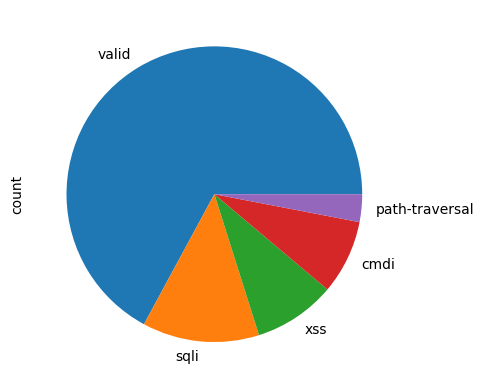

In [5]:
df['type'].value_counts().plot.pie()

In [6]:
X = df['pattern'].to_numpy().astype(str)
y = df['type'].to_numpy().astype(str)

In [7]:
print(len(X))
print(len(y))

108440
108440


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [9]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)
le = LabelEncoder()
trainY = le.fit_transform(trainY)
testY = le.transform(testY)
# np.savez('dataset', trainX=trainX, testX=testX, trainY=trainY, testY=testY)

In [10]:
# pipe = make_pipeline(TfidfVectorizer(input = 'content', lowercase = True, analyzer = 'char', max_features = 1024), SVC())

# param_grid = {'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 4)], 'svc__C': [1, 10], 'svc__kernel': ['linear', 'rbf']}

# grid = GridSearchCV(pipe, param_grid, cv = 2, verbose = 4)

# grid.fit(trainX, trainY)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV 1/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 1);, score=0.961 total time= 1.8min
[CV 2/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 1);, score=0.962 total time= 1.5min
[CV 1/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 2);, score=0.986 total time= 3.8min
[CV 2/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 2);, score=0.986 total time= 3.9min
[CV 1/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 4);, score=0.986 total time= 3.7min
[CV 2/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 4);, score=0.986 total time= 3.8min
[CV 1/2] END svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 1);, score=0.984 total time= 1.2min
[CV 2/2] END svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 1);, score=0.985 total time= 1.2min
[CV 1/2] END svc__C=1, svc__kernel=rbf, tfidfvect

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(analyzer='char',
                                                        max_features=1024)),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [1, 10], 'svc__kernel': ['linear', 'rbf'],
                         'tfidfvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (1, 4)]},
             verbose=4)

In [11]:
# grid.score(testX, testY)

0.9960162301733677

In [12]:
# from sklearn.metrics import classification_report
# preds = grid.predict(testX)
# print(classification_report(testY, preds))

                precision    recall  f1-score   support

          cmdi       1.00      0.98      0.99      2200
path-traversal       0.99      0.98      0.98       822
          sqli       1.00      0.99      1.00      3464
         valid       1.00      1.00      1.00     18192
           xss       1.00      0.99      1.00      2432

      accuracy                           1.00     27110
     macro avg       1.00      0.99      0.99     27110
  weighted avg       1.00      1.00      1.00     27110



In [13]:
# from sklearn.metrics import confusion_matrix

# confusion_matrix(testY, preds)

array([[ 2161,     5,     2,    32,     0],
       [    1,   802,     0,    19,     0],
       [    7,     0,  3440,    17,     0],
       [    1,     2,     8, 18181,     0],
       [    0,     0,     0,    14,  2418]])

In [14]:
# grid.best_params_

{'svc__C': 10, 'svc__kernel': 'rbf', 'tfidfvectorizer__ngram_range': (1, 2)}

In [16]:
# pipe = make_pipeline(TfidfVectorizer(input = 'content', lowercase = True, analyzer = 'char', max_features = 1024, ngram_range = (1, 2)), SVC(C = 10, kernel = 'rbf'))

# pipe.fit(trainX, trainY)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='char', max_features=1024,
                                 ngram_range=(1, 2))),
                ('svc', SVC(C=10))])

In [17]:
# pipe.score(testX, testY)

0.9960162301733677

In [18]:
# from sklearn.metrics import classification_report

# preds = pipe.predict(testX)

# print(classification_report(testY, preds))

                precision    recall  f1-score   support

          cmdi       1.00      0.98      0.99      2200
path-traversal       0.99      0.98      0.98       822
          sqli       1.00      0.99      1.00      3464
         valid       1.00      1.00      1.00     18192
           xss       1.00      0.99      1.00      2432

      accuracy                           1.00     27110
     macro avg       1.00      0.99      0.99     27110
  weighted avg       1.00      1.00      1.00     27110



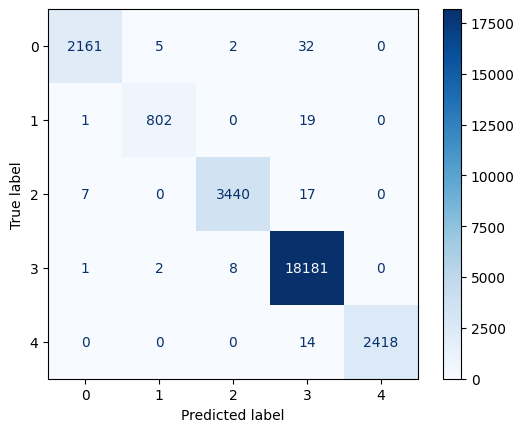

In [19]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# cm = confusion_matrix(testY, pipe.predict(testX))

# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(cmap='Blues')
# plt.show()

In [20]:
# import joblib

# joblib.dump(pipe, 'request_predictor_improved.joblib')

['request_predictor_improved.joblib']

# Tensorflow

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [12]:
num_classes = len(le.classes_)

In [13]:
num_classes

5

In [14]:
tokenizer = Tokenizer(num_words=5000, char_level=True)
tokenizer.fit_on_texts(trainX)

In [15]:
train_sequences = tokenizer.texts_to_sequences(trainX)
test_sequences = tokenizer.texts_to_sequences(testX)

In [16]:
max_len = 512
train_padded = pad_sequences(train_sequences, maxlen=max_len, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=max_len, padding='post')
vocab_size = len(tokenizer.word_index) + 1

In [18]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128),
    LSTM(128),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [19]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(
    train_padded, trainY,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    verbose=1
)

Epoch 1/10
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 966s 947ms/step - accuracy: 0.6676 - loss: 1.0856 - val_accuracy: 0.6745 - val_loss: 1.0546
Epoch 2/10
  37/1017 ━━━━━━━━━━━━━━━━━━━━ 19:40 1s/step - accuracy: 0.6653 - loss: 1.0715   


KeyboardInterrupt



In [ ]:
loss, accuracy = model.evaluate(test_padded, testY)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")